# Estimating Confidence in Models and Parameters: II

In [2]:
%matplotlib inline
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Cross Validation

In [1]:
# Detailed simulation model
COLUMN_NAMES = ["[%s]" % x for x in ['A', 'B', 'C']]
def getSimulationData():
    te.setDefaultPlottingEngine('matplotlib')
    model = """
    model test
        species A, B, C;

        J0: -> A; v0
        A -> B; ka*A;
        B -> C; kb*B;
        J1: C ->; C*kc
        ka = 0.4;
        v0 = 10
        kb = 0.8*ka
        kc = ka

    end
    """
    r = te.loada(model)
    return r.simulate(0, 50, 100)

In [3]:
result = getSimulationData()

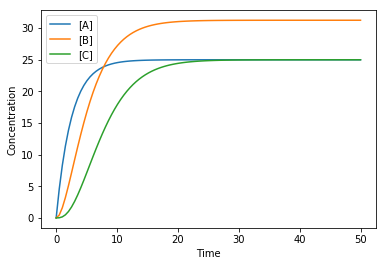

In [20]:
for col in COLUMN_NAMES:
    plt.plot(result['time'], result[col])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(COLUMN_NAMES)

In [42]:
# Set-up the data
if True:
    STD = 5
    length = len(getSimulationData())
    XVS = range(LENGTH)
    TRAIN_ERRORS = np.random.normal(0, STD, length)
    TEST_ERRORS = np.random.normal(0, STD, length)

In [38]:
# Model
def makeObservationData(errors=TRAIN_ERRORS, col='[B]'):
    model_data = getSimulationData()
    time = model_data['time']
    if errors is None:
        observations = model_data['[B]']
    else:
        observations = model_data['[B]'] + errors
    return time, observations 

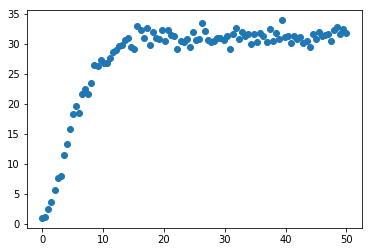

In [43]:
time, observations = makeObservationData()
plt.scatter(time, observations)